In [4]:
import pandas as pd
import numpy as np
#df1=pd.read_csv(r'C:\Users\onfon\Desktop\recommender system\tmdb_5000_movies.csv')
#df2=pd.read_csv(r'C:\Users\onfon\Desktop\recommender system\tmdb_5000_credits.csv')


In [ ]:
#https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/comments

In [10]:
#join the 2 datasets
#df1.columns = ['id','tittle','cast','crew']
#df2= df2.merge(df1,on='id')
df2=pd.merge(df1,df2,on='id')

In [12]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,11232,"[{""id"": 1808, ""name"": ""lover (female)""}, {""id""...",en,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,11.940711,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,1636,"[{""id"": 2038, ""name"": ""love of one's life""}, {...",en,Bedazzled,"Elliot Richardson, suicidal techno geek, is gi...",19.348007,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# left join in python
df3= pd.merge(df1, df2, on='id', how='left')

In [18]:
df3.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,Unnamed: 1255,Unnamed: 1256,Unnamed: 1257,Unnamed: 1258,Unnamed: 1259,Unnamed: 1260,Unnamed: 1261,Unnamed: 1262,Unnamed: 1263,Unnamed: 1264
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df3.to_csv('Name.csv')

In [15]:
df3=pd.read_excel(r'C:\Users\onfon\Desktop\recommender system\Name.xlsx')
df3.head(2)

,Movie Id,Title (Credit),Cast,Crew,Budget,Genres,Homepage,Id,Keywords,Original Language,...,Production Countries,Release Date,Revenue,Runtime,Spoken Languages,Status,Tagline,Title,Vote Average,Vote Count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [6]:
#calculate c
C= df3['Vote Average'].mean()
C

6.092691584882017

In [7]:
#mean rating
m= df3['Vote Count'].quantile(0.9)
m

1813.1999999999998

In [8]:
#filter movie that qualify
q_movies=df3.copy().loc[df3['Vote Count']>=m]
q_movies.shape

(479, 24)

In [9]:
#calculate the metric for qualified movies
def weighted_rating(x,m=m,C=C):
    V=x['Vote Count']
    R=x['Vote Average']
    #calculation based on imdb formula
    return(V/(V+m)*R)+(m/(m+V)*C)

In [10]:
#define a new feature 'score' & calculate its value
q_movies['score']=q_movies.apply(weighted_rating,axis=1)

# Trending now

In [11]:
#sort movies based on scores calculated
q_movies=q_movies.sort_values('score',ascending=False)
#print the top 15 movies
q_movies[['Title','Vote Count','Vote Average','score']].head(5)

,Title,Vote Count,Vote Average,score
1873,The Shawshank Redemption,8205,8.5,8.064300
655,Fight Club,9413,8.3,7.943487
65,The Dark Knight,12002,8.2,7.923423
3223,Pulp Fiction,8428,8.3,7.909197
96,Inception,13752,8.1,7.866167


In [12]:
df3.dropna()

,Movie Id,Title (Credit),Cast,Crew,Budget,Genres,Homepage,Id,Keywords,Original Language,...,Production Countries,Release Date,Revenue,Runtime,Spoken Languages,Status,Tagline,Title,Vote Average,Vote Count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""cre

Text(0.5, 1.0, 'Popular Movies')

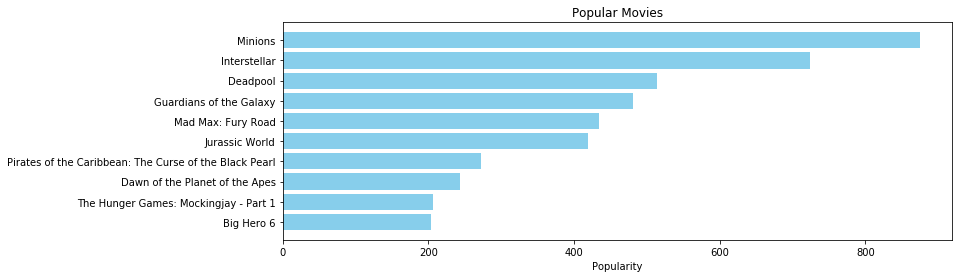

In [17]:
pop= df3.sort_values('Popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['Title'].head(10),pop['Popularity'].head(10), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# plot description

In [18]:
df3['Overview'].head(5)


0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bondâ€™s past sends him...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: Overview, dtype: object

In [21]:
#import tfidfvectorizer
from sklearn.feature_extention.text import TfidfVetorizer


ModuleNotFoundError: No module named 'sklearn.feature_extention'

In [22]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df3['Overview'] = df3['Overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df3['Overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4789, 21217)

In [24]:
#import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
#compute the cosine similarity
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [25]:

#Construct a reverse map of indices and movie titles
indices = pd.Series(df3.index, index=df3['Title']).drop_duplicates()

In [26]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[Title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3['Title'].iloc[movie_indices]

In [27]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
295                              Batman Forever
423                              Batman Returns
1351                                     Batman
3842    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2499                                  Slow Burn
1173                                        JFK
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
Name: Title, dtype: object

In [28]:


get_recommendations('The Avengers')



7               Avengers: Age of Ultron
3135                            Plastic
1707                            Timecop
4112                 This Thing of Ours
3302              Thank You for Smoking
3024                      The Corruptor
583     Wall Street: Money Never Sleeps
2128         Team America: World Police
1460                       The Fountain
1278                        Snowpiercer
Name: Title, dtype: object

# Credits, Genres and Keywords Based Recommender

In [29]:
from ast import literal_eval

def literal_eval_cust(x):
    try:
        return literal_eval(x)
    except Exception:
        return {}

features = ['Cast', 'Crew', 'Keywords', 'Genres']
for feature in features:
    df3[feature] = df3[feature].apply(literal_eval_cust)

#print (df)

# movie DB https://www.themoviedb.org/documentation/api?language=en-US

In [30]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [32]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [36]:


# Define new director, cast, genres and keywords features that are in a suitable form.
df3['Director'] = df3['Crew'].apply(get_director)

features = ['Cast','Keywords', 'Genres']
for feature in features:
    df3[feature] = df3[feature].apply(get_list)



TypeError: string indices must be integers

In [37]:
# Print the new features of the first 3 films
df3[['Title', 'Cast','Crew' ,'Director', 'Keywords', 'Genres']].head(3)

,Title,Cast,Crew,Director,Keywords,Genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [38]:
df3.to_csv('clean_data.csv')

In [42]:
from ast import literal_eval

def literal_eval_cust(x):
    try:
        return literal_eval(x)
    except Exception:
        return {}

features = ['Production Companies','Production Countries']
for feature in features:
    df3[feature] = df3[feature].apply(literal_eval_cust)

#print (df)

In [43]:
#===================================
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [44]:

# Define new director, cast, genres and keywords features that are in a suitable form.
#df3['Director'] = df3['Crew'].apply(get_director)

features = ['Production Companies','Production Countries']
for feature in features:
    df3[feature] = df3[feature].apply(get_list)


In [46]:
# Print the new features of the first 3 films
df3[['Production Companies','Production Countries']].head(3)

,Production Companies,Production Countries
0,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]"
1,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America]
2,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]"


In [47]:
df3.to_csv('clean1_data.csv')

In [52]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [54]:
# Apply clean_data function to your features.
features = ['Cast', 'Keywords', 'Director', 'Genres','Production Companies','Production Countries','Overview','Tagline']
for feature in features:
    df3[feature] = df3[feature].apply(clean_data)



In [66]:
#creating the metadata
def create_soup(x):
    return ' '.join(x['Keywords']) + ' ' + ' '.join(x['Cast']) + ' ' + x['Director'] + ' ' + ' '.join(x['Genres'])+ ' '+ x['Tagline']+ ' '+ ' ' .join(x['Production Companies'])+ ' '+ ' ' .join(x['Production Countries'])+ ' ' + x['Overview']
df3['soup'] = df3.apply(create_soup, axis=1)

In [67]:
df3[['soup']].head(5)

,soup
0,cultureclash future spacewar samworthington zo...
1,ocean drugabuse exoticisland johnnydepp orland...
2,spy basedonnovel secretagent danielcraig chris...
3,dccomics crimefighter terrorist christianbale ...
4,basedonnovel mars medallion taylorkitsch lynnc...


#  CountVectorizer() instead of TF-IDF. 

In [68]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df3['soup'])



In [70]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [69]:
# Reset index of our main DataFrame and construct reverse mapping as before
df3 = df3.reset_index()
indices = pd.Series(df3.index, index=df3['Title'])

In [71]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Title, cosine_sim2=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[Title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3['Title'].iloc[movie_indices]

In [72]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65        The Dark Knight
119         Batman Begins
1188         The Prestige
14           Man of Steel
10       Superman Returns
600              Blackhat
404     Collateral Damage
3064    Romeo Is Bleeding
4395       Jimmy and Judy
95           Interstellar
Name: Title, dtype: object

In [73]:
get_recommendations('The Godfather', cosine_sim2)

860         The Godfather: Part III
2723         The Godfather: Part II
1162        The Talented Mr. Ripley
2208                We're No Angels
2641              The Son of No One
1655    Once Upon a Time in America
1386                  Donnie Brasco
4172              Deadline - U.S.A.
607                       The Score
1201                  The Rainmaker
Name: Title, dtype: object

In [ ]:
#e can also increase the weight of the director , by adding the feature multiple times in the soup.


# collaborative filtering

In [ ]:
!pip install surprise

In [74]:
from surprise import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv(r'D:\Movies\movies dataset\rating.csv')
ratings.head()

ModuleNotFoundError: No module named 'surprise'